# 12 Clipping

In this lesson we will learn how to to clip different geometries.

## About the data

We will use three datasets in this lesson. 

The first dataset is a [TIGER shapefile of the US states from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). Follow these steps to download shapefile with the United States' states:

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

We will combine these datasets to create the following map of infrastructure in Alaska:

## Import data

Let's start by loading our libraries and then importing the datasets we will use.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box


pd.set_option("display.max.columns", None)

# -------------------------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data', 
                                    'tl_2022_us_state', 
                                    'tl_2022_us_state.shp'))

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

## Check-in
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [2]:
for df in [states, places, roads]: 
    df.columns = df.columns.str.lower()

## Prepare Alaska multipolygon

Examine data. 

In [5]:
print(f"CRS: {states.crs}")
states.head(2)

CRS: EPSG:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."


<Axes: >

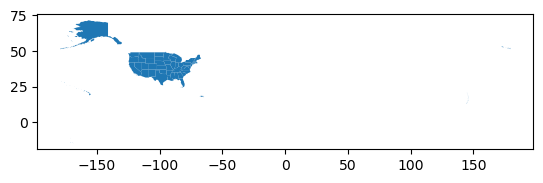

In [6]:
states.plot()

We are interested in Alaska data only

In [7]:
alaska = states[states['name'] == 'Alaska']

In [9]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Insepct new CRS
print('Is this CRS projected?', alaska.crs.is_projected)
alaska.crs

Is this CRS projected? True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

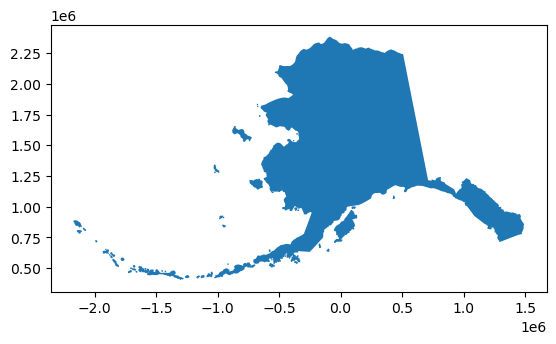

In [10]:
alaska.plot()

## Prepare populated places points

Explore the data.

In [12]:
print("CRS: ", places.crs)
places.head(2)

CRS:  EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)


<Axes: >

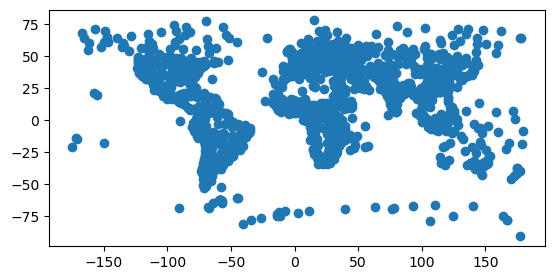

In [13]:
places.plot()

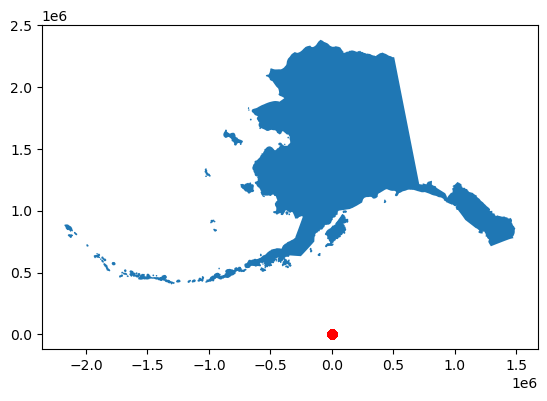

In [ ]:
fig, ax = plt.subplots()
alaska.plot(ax = ax)
places.plot(ax = ax, color = 'red')

plt.show()

**Data in weird places? Check that the CRSs match.**
To plot, analyze, or integrate different geospatial datasets they **must have the same CRS**.

In [19]:
alaska.crs == places.crs

False

## Check-in
Reproject the 'places' geo-dataframe into 'alaska'`s CRS and verify the CRSs match using 'assert'

In [22]:
# Reproject to CRS optimized for Alaska
places = places.to_crs(alaska.crs)

# Verify the CRSs match
assert places.crs == alaska.crs

## Clipping 

**Clipping** means using a polygon(s) to only select data within it. 

Syntax: 
```

updated_geodf = geopandas.clip(geodf, mask)
```

where:
'updated_geodf' = intersection of the geometries in 'geodf' with 'mask' 
- 'mask' = 'gpd.GeoDataFrame' with the polygons you want to use for clipping.

Make sure the CRSs for the 'mask' and 'geodf' match.

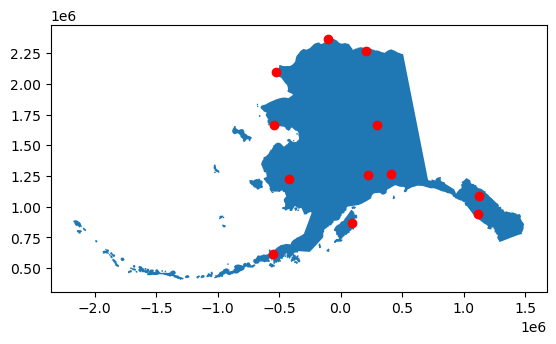

In [23]:
# Clip populated places to Alaska multi-polygon
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')
plt.show()

## Prepare roads

Examine the roads dataset

In [25]:
print('CRS: ', roads.crs)
roads.head(2)

CRS:  EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."


<Axes: >

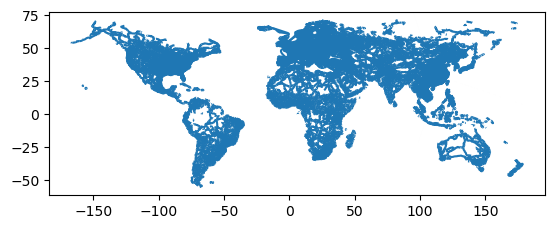

In [26]:
roads.plot()

Before jumping into reprojecting and clipping, we will subset the data to select only US roads.

It's good practice to reduce geospatial data as much as possible before applying any geospatial transformations.

<Axes: >

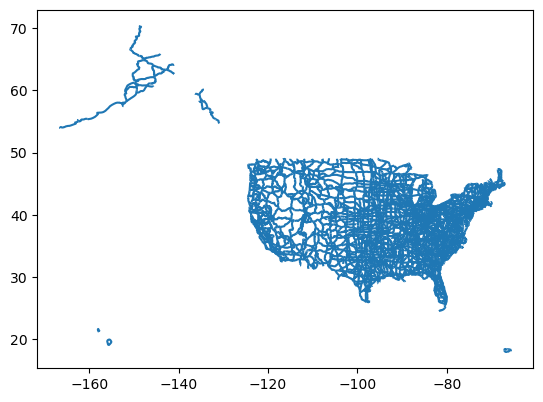

In [32]:
usa_roads = roads[roads['sov_a3'] == 'USA']
usa_roads.plot()

In [33]:
# Clip USA roads to Alaska Geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)

<function matplotlib.pyplot.show(close=None, block=None)>

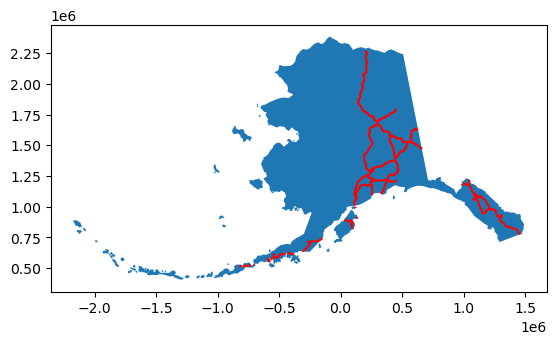

In [36]:
fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color = 'red')
plt.show

## Clipping with bounding box

We will clip the `usa_roads` with a **bounding box** of alaska instead of the polygons

We will create the bounding box with 'box()' function from `shapely`.

We construct a box by passing 4 numbers into `box()`:

`box(minx, miny, maxx, maxy)`

In [37]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815])

<class 'shapely.geometry.polygon.Polygon'>


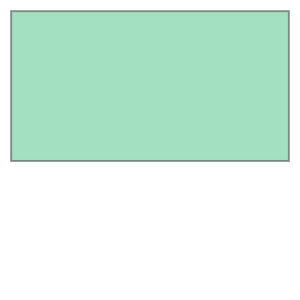

In [40]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

* = unpacking operatro

Think about it as "unpacking the elements in 'akaska.total_bounds' and assigning them one-by-one to the parameters 'minx', 'miny', 'maxx', 'maxy' of the 'box()' function'

In [43]:
print(['a', 'b', 'c'])
print(*['a', 'b', 'c'])

['a', 'b', 'c']
a b c


In [44]:
# Create a geo-dataframe from Alaska bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox], # Assign geometry column
                           crs = alaska.crs)  # Assign CRS

<Axes: >

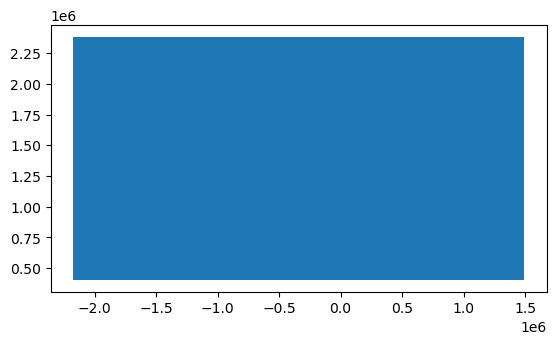

In [45]:
ak_bbox.plot()

We can now Clip the roads usuing Alaska's bounding box

In [50]:
# Clip USA roads to Alaska Bounding Box
ak_complete_roads = gpd.clip(usa_roads.to_crs(alaska.crs), ak_bbox)

Text(0.5, 1.0, 'Roads clipped with AK bounding box')

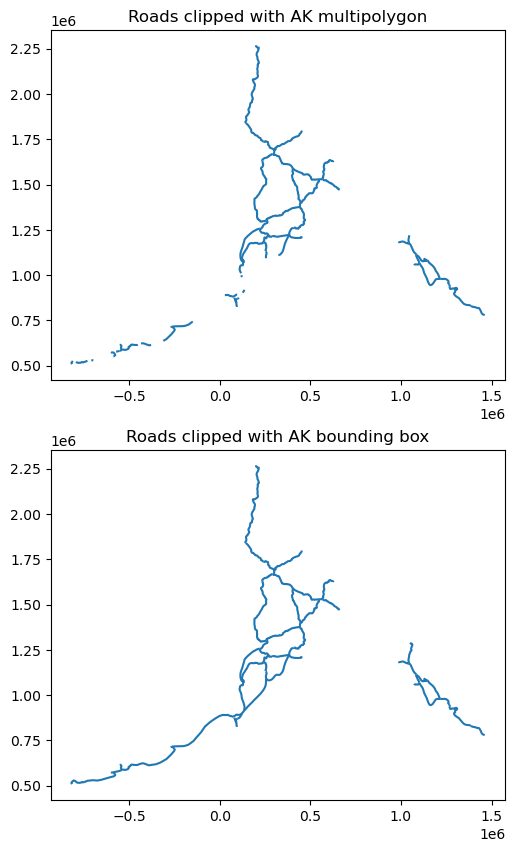

In [51]:
# Compare both clipping methods

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title("Roads clipped with AK multipolygon")

ak_complete_roads.plot(ax=ax2)
ax2.set_title("Roads clipped with AK bounding box")

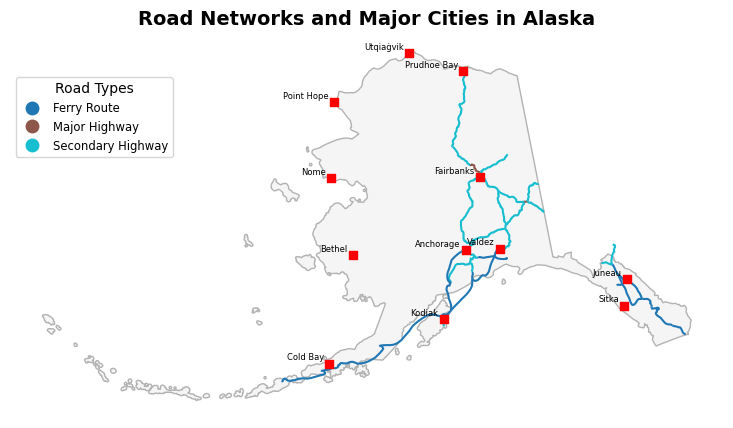

In [ ]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    ax.text(x-30000, y+20000, name, fontsize=6, ha='right')

    

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# Update overlapping labels Anchorage and Valdez


        

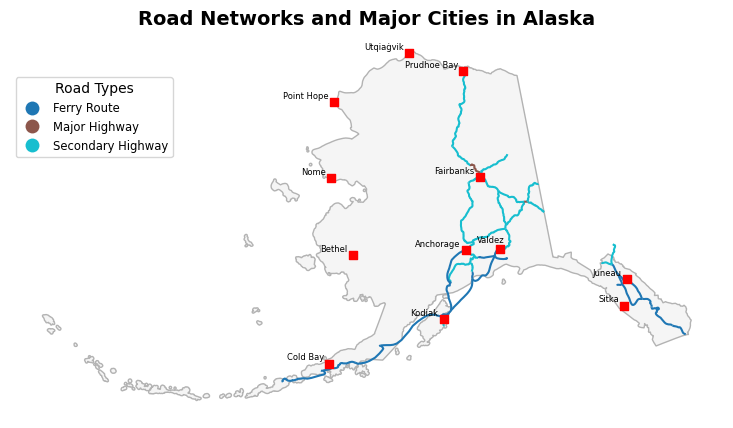

In [74]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name != 'Valdez':
        ax.text(x-30000, y+20000, name, fontsize=6, ha='right')
    else:
        ax.text(x+30000, y+35000, name, fontsize=6, ha='right')

    

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()